# **Linear Regression**
***
Regression digunakan untuk memprediksi nilai dari variabel y berdasarkan relasinya dengan nilai variabel x (minimal 1) atau untuk menjelaskan apa pengaruh dari perubahan pada sebuah independent variable terhadap dependent variable melalui estimasi nilai numerik dari hubungan yang ada.

Linear Regression memiliki beberapa tipe yaitu **simple regression** dan **multiple regression** (x factor nya banyak). Tujuan linear regression untuk menganalisa dua variabel dan **memprediksi nilai baru yang memungkinkan**. 

Linear regression merupakan algoritma supervised learning dari sekumpulan data latih, dia mengestimasi hubungan antara 2 variabel.

## Load Dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/andikap03/Dataset-latihan/main/house_prices.csv'
data = pd.read_csv(url)
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


## Plot Data

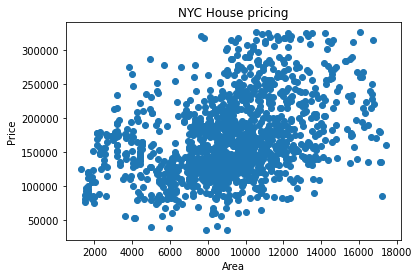

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Dari sebaran data di grafik tersebut dapat dilihat sekilas bahwa data Harga Rumah cenderung naik jika luas rumah naik.

Case : jika memiliki luas tanah 14000sq feet berapa harga yang didapatkan?

Case tersebut dapat diselesaikan dengan membuat garis lurus untuk mengetahui prediksi harga rumah.

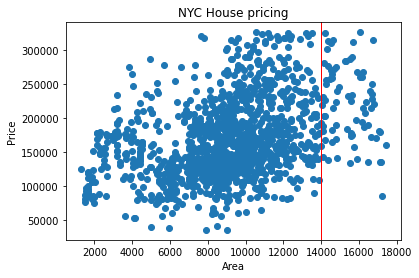

In [4]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=14000,linewidth='1',color='r')
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Untuk prediksi tren harga rumah, ada beberapa garis berikut yang cukup pas untuk melakukan prediksi trend tersebut.

$ price = 30000 + 15 area\\ price=10000 + 17 area\\ price= 50000 + 12 area $ 

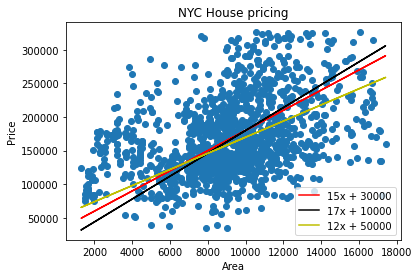

In [9]:
import matplotlib.pyplot as plt

plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(['15x + 30000','17x + 10000', '12x + 50000'])
plt.show()

Seperti dapat dilihat bahwa ketiga garis seperti pas untuk menggambarkan tren harga rumah tersebut, namun ternyata ketiganya memilihi hasil yang berbeda.

Contoh : untuk area rumah 9600, prediksi berdasarkan ketiga garis tersebut adalah,

In [11]:
# red line: 
print("red line:", 30000 + 15*9600)       # <-- Inserted value 9600 inplace of LotArea 
# black line: 
print('black line:', 10000 + 17*9600)     # <-- Inserted value 9600 inplace of LotArea
# yellow line:
print('yellow line:', 50000 + 12*9600)     # <-- Inserted value 9600 inplace of LotArea

red line: 174000
black line: 173200
yellow line: 165200


Dapat dilihat bahwa hasil prediksi ketiga garis berbeda, lalu bagaimana untuk memilih garis yang tepat?

Kita dapat mencari garis mana yang lebih mendekati nilai aslinya. Caranya adalah dengan menghitung kuadrat selisih garis predisi dengan garis asli atau dikenal sebagai **least squares cost function**. Tujuannya adalah denga meminimalisasi **cost function **untuk mendapatkan garis yang cocok.

## Use Linear Regression
Linear regression menggunakan perhitungan least-squares cost function atau biasa dikenal sebagai **Ordinary Least Squared Linear Regression**

In [15]:
X = data.LotArea[:,np.newaxis] # Reshape
y = data.SalePrice

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Predict dan Plot

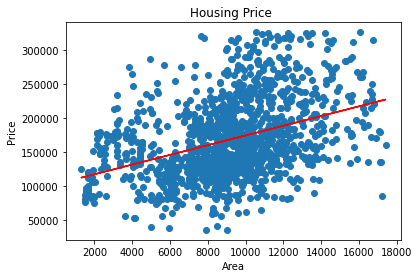

In [16]:
# Predicting the Test set results
y_pred = regressor.predict(X)

# Plotting the Best Fitting Line
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Setelah mendapatkan garis trend yang tepat dengan **linear regression**, coba kita prediksi harga rumah yang ada pada case sebelumnya yaitu dengan luas 14000.

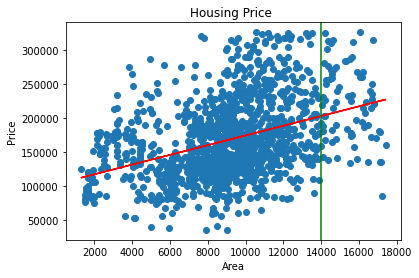

In [17]:
# Predict Case 
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g');

Dapat dilihat pada grafik diatas bahwa untuk rumah dengan luas tanah ~ 14,000, perlu membayar sekitar **~ 200,000-225,000**

# **Multivariate Linear Regression**
***
Pada Univariate Linear Regression digunakan dua variabel, satu sebagai Dependent Variable dan yang lain sebagai Independent variable.

Sekarang akan digunakan Multiple Dependent variables dan akan memprediksi tren harga (Independent variable).

## Load Dataset

In [18]:
#Loading the data
url = 'https://raw.githubusercontent.com/andikap03/Dataset-latihan/main/house_prices_multivariate.csv'
NY_Housing = pd.read_csv(url)
NY_Housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [19]:
# Making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1] # Selecting everything except the last column
y = NY_Housing.SalePrice 

## Use Linear Regression

In [20]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X, y)

LinearRegression()

In [21]:
print("intercept:", regressor.intercept_)               # This is the y-intercept 
print("coefficients of predictors:", regressor.coef_)   # These are the weights or regression coefficients.

intercept: 310649.26008873095
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860421e-01 -6.61329855e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155080e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


## Predict
Akan diprediksi harga dengan spesifikasi rumah sebagai berikut:

In [24]:
my_house = X.iloc[155]
my_house

LotFrontage          0.0
LotArea          16669.0
OverallQual          8.0
OverallCond          6.0
YearBuilt         1981.0
YearRemodAdd      1981.0
MasVnrArea         653.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF         1686.0
TotalBsmtSF       1686.0
1stFlrSF          1707.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea         1707.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             2.0
HalfBath             1.0
BedroomAbvGr         2.0
KitchenAbvGr         1.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
GarageYrBlt       1981.0
GarageCars           2.0
GarageArea         511.0
WoodDeckSF         574.0
OpenPorchSF         64.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
YrSold            2006.0
Name: 155, dtype: float64

In [30]:
my_house.values.reshape(1,-1)

array([[0.0000e+00, 1.6669e+04, 8.0000e+00, 6.0000e+00, 1.9810e+03,
        1.9810e+03, 6.5300e+02, 0.0000e+00, 0.0000e+00, 1.6860e+03,
        1.6860e+03, 1.7070e+03, 0.0000e+00, 0.0000e+00, 1.7070e+03,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9810e+03, 2.0000e+00,
        5.1100e+02, 5.7400e+02, 6.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0060e+03]])

In [38]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1)) # reshape to 2D array
print("predicted value:", round(pred_my_house[0],2))
print("actual value:", y[155])

predicted value: 264519.42
actual value: 228000


Setelah didapatkan, harga rumahyang diprediksi tidak berbeda jauh dengan harga aslinya.

Sekarang dicoba untuk memprdiksi seluruh harga rumah di dataset.

In [53]:
# Predicting the results
y_pred = regressor.predict(X)
y_preds = [round(y_pred[i],2) for i in range(len(y_pred))]
y_pred = np.array(y_preds)

In [54]:
prices = pd.DataFrame({"actual": y,
                       "predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,223165.24
1,181500,193708.15
2,223500,216394.80
3,140000,197356.63
4,250000,295125.75
5,143000,172516.96
6,307000,269477.13
7,200000,245198.81
8,129900,168787.92
9,118000,87185.79


## Measure Goodness Fit
Kita telah melakukan prediksi harga rumah. Bagaimanapun, semakin naik nilai prediksi yang dilakukan, akan sulit untuk melakukan cek goodness of fit secara manual. Oleh karena itu, dapat digunakan **cost function** untuk mengecek goodness of fit.

In [55]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.8046479856987605

Terdapat tiga **Basic Evaluation Metrics** untuk regression yang digunakan untuk mengecek goodness of fit.
* Mean Absolute Error
* Root Mean square Error
* R-Square (Residual value)

# **Advanced Linear Regression**
***

## Underfitting
Underfitting adalah ketika model gagal menangkap keseluruhan 'tren' data. Sebagai contoh: Model linier akan melakukan pekerjaan yang sangat buruk dalam menjelaskan variabel target jika dipasang ke data nonlinier. Ini akan menyederhanakan model.

Model yang underfits dikatakan memiliki bias yang tinggi.

## Polynomial Regression
Salah satu cara untuk mengatasi underfitting adalah melalui fungsi polinomial. Transformator Polinomial adalah mengambil derajat ke-n dari variabel.

In [56]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Nilai 3 di PolynomialFeatures pada dasarnya adalah nilai derajat dari polinomial yang datanya ingin kita ubah. 

Sekarang, mari kita gunakan teknik yang sama untuk membuat model polinomial derajat ke-7 untuk data non-linier yang dihasilkan sebelumnya.

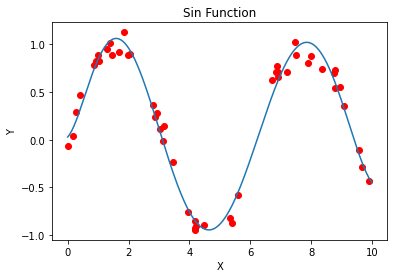

In [60]:
# make_pipeline() is used to perform a sequence of different transformations on
# a raw dataset before applying the final estimator. 
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression()) 
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, color='r')
plt.plot(xfit, yfit)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

Ada banyak keuntungan menggunakan regresi polinomial seperti
* Berbagai fungsi dapat disesuaikan dengan model
* Fungsi polinomial cocok untuk berbagai kelengkungan
* Ini memberikan pendekatan yang baik dari hubungan dan membuat transformasi lebih bisa ditafsirkan.

## Overfitting
Overfitting terjadi ketika model mengikuti dataset latih dengan sangat ketat, yaitu memberikan train loss rendah. Tetapi mungkin tidak berfungsi dengan baik pada kumpulan data umum atau uji atau mungkin memberikan kesalahan generalisasi yang tinggi.

Misalnya seperti seseorang yang menghafalkan kata demi kata dari sebuah buku untuk belajar menghadapi ujian. Jika pertanyaan-pertanyaan dalam tes ini persis seperti di buku, dia akan melakukannya dengan baik, jika tidak pertanyaan lebih didasarkan pada penggunaan beberapa konsep yang diuraikan dalam buku yang dipelajarinya, dan tidak secara langsung dinyatakan persis, orang tersebut mungkin akan lebih sulit menjawab soal ujainnya.

Model overfitting dikatakan memiliki varians yang tinggi.

## Regularization
Teknik regularisasi digunakan untuk mengurangi kesalahan dengan memasang fungsi secara tepat pada data set latih yang diberikan untuk menghindari overfitting. 

Concept of Regularization :
* L1 Regularization (Lasso penalisation)
* L2 Regularization (Ridge penalisation)
* L1 vs L2 Regularization

### Lasso (L1) Regularization

In [61]:
url = 'https://raw.githubusercontent.com/andikap03/Dataset-latihan/main/house_prices_multivariate.csv'
data = pd.read_csv(url)
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [63]:
# Splitting data 
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data['SalePrice']

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.3)

In [66]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score

lasso_model = Lasso(alpha=140, max_iter=100000, random_state=6)

# fit the model on one set of data
lasso_model.fit(X_train, y_train)

# predict
y_pred = lasso_model.predict(X_test)
y_pred[:10]

array([162645.0226729 , 224293.84172766, 125111.86547247, 177518.13003013,
       403099.75767314, 178768.29976699, 156157.06320746, 536206.42243534,
        84390.78687568, 143562.92179753])

In [67]:
# evaluate the model on the second set of data
mean_squared_error(y_test, y_pred)

# Getting the r2 score
r2_score(y_test, y_pred)

0.8104803660619624

### Ridge (L2) Regularization

In [70]:
ridge_model = Ridge(alpha=0.00001, max_iter=100000, random_state=6)

# fit the model on one set of data
ridge_model.fit(X_train, y_train)

# predict
y_pred = ridge_model.predict(X_test)
y_pred[:10]

array([158667.2831389 , 225000.77257177, 124415.00162324, 176253.56250364,
       403284.58514488, 176646.8913308 , 156048.63918727, 536242.22508141,
        84350.90642671, 144714.75405155])

In [71]:
# evaluate the model on the second set of data
mean_squared_error(y_test, y_pred)
r2_score(y_test,y_pred)

0.8086901252339399

**Yang manakah yang lebih baik, Rigde or Lasso?**

Katakanlah kita memiliki kumpulan data besar yang memiliki 10.000 fitur. Dan beberapa fitur independen berkorelasi dengan fitur independen lainnya.

* Jika kita menerapkan regresi ridge untuk itu, itu akan mempertahankan semua fitur tetapi akan mengecilkan koefisien. Namun masalahnya adalah model itu akan tetap kompleks karena ada 10,000 fitur, sehingga dapat menyebabkan kinerja model yang buruk.
* Jika kita menerapkan regresi laso untuk masalah ini, masalah utamanya adalah ketika kita memiliki variabel berkorelasi, itu akan mempertahankan hanya satu variabel dan menetapkan variabel berkorelasi lainnya ke nol.
* Itu mungkin akan menyebabkan hilangnya informasi yang mengakibatkan akurasi yang lebih rendah dalam model.